# Credit Card Fraud Detection Using Logistic Regression
# Dataset from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud


In [22]:
import numpy as np
import sklearn as sk
import pandas as pd

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from time import time
import random

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
cc_df = pd.read_csv('data/creditcard.csv', low_memory=False)
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
print(list(cc_df.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [25]:
cc_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# 0 is  Non-Fraud & 1 is Fraud. Very few cases of fraud transactions.

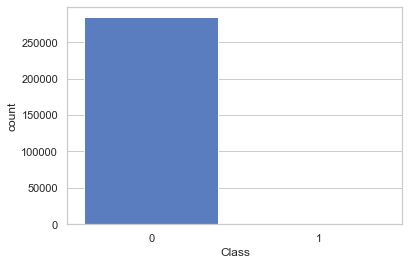

In [26]:
fraud = cc_df.loc[cc_df['Class'] == 1]
non_fraud = cc_df.loc[cc_df['Class'] == 0]

sns.countplot(x='Class', data=cc_df, palette="muted")
plt.show()

# Partitioning the data

In [71]:
X = cc_df.iloc[:,:-1]
y = cc_df['Class']
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state=500)

In [72]:
logit =LogisticRegression(solver='lbfgs')

In [73]:
logit_model = logit.fit( X_train,y_train)

In [74]:
predictions = logit.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos))/ len(X_test)

print("Accuracy", accuracy)
print("False Negative Rate (Misclassification):", false_neg_rate)
print("False Negative Rate (All Data)", false_neg/len(predictions))

print("False Negatives:", false_neg," False Positives", false_pos,"Mispredictions", false_neg + false_pos )

print("Total test data points", len(X_test), "Train data points",len(X_train))

Accuracy 0.9991222218320986
False Negative Rate (Misclassification): 0.8
False Negative Rate (All Data) 0.0007022225343211264
False Negatives: 60  False Positives 15 Mispredictions 75
Total test data points 85443 Train data points 199364
